In [1]:
#1 A)
list_probs=[[1/6,1/6,1/6,1/6,1/6,1/6],[0.5, 0.5],[1/3, 1/3,1/3],
            [0.25, 0.25, 0.25, 0.25],[1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8]]

import math as m

In [2]:
def entropy_calculator(probabilities):
    entropies=[]
    for i in range(len(probabilities)):
        individual_scores=0
        for j in range(len(probabilities[i])):       
            individual_scores+=-probabilities[i][j]*m.log(probabilities[i][j], 2)
        entropies.append(individual_scores)
    return sorted(entropies, reverse=True)
        
entropy_calculator(list_probs)

[3.0, 2.584962500721156, 2.0, 1.584962500721156, 1.0]

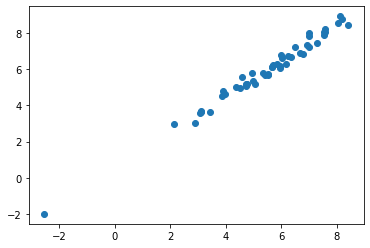

In [3]:
#1 B)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from numpy.linalg import eig

#Generating random data and seeing what it looks like 

X = np.random.normal(5, 2, 50)

rng = np.random.RandomState(2)
y = X + rng.rand(50)

plt.scatter(X, y)

array= np.column_stack((X, y))

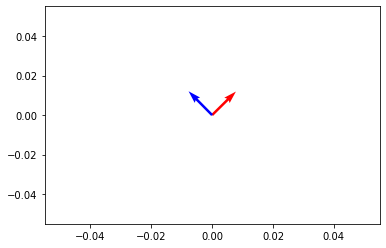

The eigen vectors are: [[ 0.71124481 -0.70294439]
 [ 0.70294439  0.71124481]]


In [4]:
def PCA (array):
    means=np.mean(array.T, axis=1)
    centering = array - means
    cov_matrix = np.cov(centering.T)
    eigen_values, eigen_vectors= LA.eig(cov_matrix)
    origin = [0, 0]

    vector1 = eigen_vectors[:,0]
    vector2 = eigen_vectors[:,1]


    plt.quiver(*origin, *vector1, color=['r'], scale=10)
    plt.quiver(*origin, *vector2, color=['b'], scale=10)
    plt.show()
    return print("The eigen vectors are:", eigen_vectors)

PCA(array)

In [5]:
#2
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score

dataset=pd.read_csv("C:/Users/mailv/OneDrive/Documents/Machine_learning/titanic.csv")

dataset.head() #see what the data looks like 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#See how probabilities are distributed
count_age = dataset['Age'].value_counts(dropna=False)
print(count_age) #Get some insight as to what the distribution looks like
dict_prob = count_age.to_dict()
prob_unnorm = list(dict_prob.values())
keys = list(dict_prob.keys())
keys = keys[1:]
probabilities = []
for i in range(1, len(prob_unnorm)): #start at 1 so you skip the NaN
    probabilities.append(prob_unnorm[i]/(891-177))
        
ages = np.random.choice(keys, 177, p=probabilities) #pick  177 times (for every missing age) from the known probabilities 
                                                    #and get the associated key


NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64


In [7]:
#filling the gaps with the generated data
Age=list(dataset['Age']) 
New_Age=[]
item=0
for i in range(len(Age)):
    if np.isnan(Age[i]) == True:
        New_Age.append(ages[item])
        item+=1
    else: 
        New_Age.append(Age[i])
        
New_Age=pd.Series(New_Age)

In [8]:
sex = pd.Series(dataset['Sex'].replace(['female','male'],[int(0),int(1)]))
Pclass=(dataset['Pclass'])
SibSp = dataset['SibSp']
features = pd.concat([sex, Pclass, New_Age, SibSp], axis=1) #making it into a dataframe again


In [9]:
X=features
y=dataset['Survived']

clf = tree.DecisionTreeClassifier(criterion="entropy") #gini and entropy give similar results

score6 = list(cross_val_score(clf, X, y, cv=6))
score8 = cross_val_score(clf, X, y, cv=8)

score6_avg = round(sum(score6)/ len(score6) *100, 1)

#good scores because if I use round() I get weird output like 81.1000000000001

good_scores6=[]
for i in range(len(score6)):
    good_scores6.append(('%.1f' % round(score6[i]*100, 1)))

score8_avg = round(sum(score8)/ len(score8) *100, 1)
good_scores8=[]    
for i in range(len(score8)):
    good_scores8.append(('%.1f' % round(score8[i]*100, 1))) 
    

print('Scores (in percentages) for cv = 6 are:', good_scores6,'and mean is:', score6_avg)
print('Scores (in percentages) for cv = 8 are:', good_scores8,'and mean is:', score8_avg)

Scores (in percentages) for cv = 6 are: ['69.8', '79.2', '78.5', '81.8', '75.0', '79.1'] and mean is: 77.2
Scores (in percentages) for cv = 8 are: ['75.0', '70.5', '81.2', '76.6', '77.5', '76.6', '78.4', '77.5'] and mean is: 76.7
